#### Introduction

There have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. This study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well that relate to life expectancy. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

#### Importing important libraries

In [263]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#### Reading the dataset into a Pandas Dataframe Object


In [277]:
data = pd.read_csv("diamonds.csv")


#### taking a quick look at what the data looks like:

In [278]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [279]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [280]:
data.replace(['Fair', 'Very Good', 'Good', 'Premium', 'Ideal'],
             [1, 2, 3, 4, 5], inplace=True)

In [282]:
data['clarity'].unique()


array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [283]:
data.replace(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'],
             [10, 9, 8, 7, 6, 5, 4, 3], inplace=True)

In [285]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,E,4,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,E,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,E,7,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,I,6,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,J,4,63.3,58.0,335,4.34,4.35,2.75


In [287]:
data.dtypes

carat      float64
cut          int64
color       object
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [288]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [289]:
data.corr()

,carat,cut,clarity,depth,table,price,x,y,z
carat,1.000000,-0.114426,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.114426,1.000000,0.152860,-0.169916,-0.381988,-0.049421,-0.105361,-0.105319,-0.126726
clarity,-0.352841,0.152860,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952
depth,0.028224,-0.169916,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.381988,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.049421,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.105361,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.105319,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.126726,-0.366952,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


#### Since Status is Categorical ordinal, we can replace it with numerical distinct values.
We use Dataframe.replace() for that.

In [244]:
data.replace(['Manual', 'Automatic'], [0, 1], inplace=True)
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,0,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,0,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,0,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,0,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,0,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [247]:
data['fuel'].unique()


array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [250]:
data.replace(['Diesel', 'Petrol', 'LPG', 'CNG'], [0, 1, 2, 3], inplace=True)
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,Individual,0,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,Individual,0,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,Individual,0,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,Individual,0,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,Individual,0,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [251]:
data['seller_type'].unique()


array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [252]:
data.replace(['Individual', 'Dealer', 'Trustmark Dealer'],
             [0, 1, 2], inplace=True)
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,0,0,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,0,0,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,0,0,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,0,0,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,0,0,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [255]:
data.corr()


,year,selling_price,km_driven,fuel,seller_type,transmission,seats
year,1.000000,0.414092,-0.418006,-0.051355,0.234741,0.244707,-0.009144
selling_price,0.414092,1.000000,-0.225534,-0.202916,0.323047,0.588845,0.041358
km_driven,-0.418006,-0.225534,1.000000,-0.239728,-0.194966,-0.201229,0.227336
fuel,-0.051355,-0.202916,-0.239728,1.000000,0.031641,0.010049,-0.336661
seller_type,0.234741,0.323047,-0.194966,0.031641,1.000000,0.355598,-0.075394
transmission,0.244707,0.588845,-0.201229,0.010049,0.355598,1.000000,-0.072821
seats,-0.009144,0.041358,0.227336,-0.336661,-0.075394,-0.072821,1.000000


In [249]:
data.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel               int64
seller_type       object
transmission       int64
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

#### Performing data cleaning


Getting a look of the number of null values in the dataset. We will use isnull().sum() for that as it will count the number of null values in each column. 

In [63]:
data.isnull().sum()


country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
HIV_AIDS                             0
GDP                                448
population                         652
thinness_1_19 years                 34
thinness_5_9_years                  34
Income_composition_of_resources    167
schooling                          163
dtype: int64

Replacing null values with the mean. For that we calculate the mean of all columns and use `fillna()` function to replace all null occurances with the mean. 

In [64]:
def replace_with_mean(s):
    if s != 'country':
        mean = data[s].mean()
        data[s].fillna(mean, inplace=True)

for column in data.columns:
    replace_with_mean(column)


Now our data doesn't contain any null value

In [65]:
data.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
HIV_AIDS                           0
GDP                                0
population                         0
thinness_1_19 years                0
thinness_5_9_years                 0
Income_composition_of_resources    0
schooling                          0
dtype: int64

#### Getting general information about the dataset

In [362]:
data.describe()

,carat,cut,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.771060,6.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.265976,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,3.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,5.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,6.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,7.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,10.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### Calculating the correlation matrix of the dataset using `pandas.DataFrame.corr()` function

In [290]:
correlation_matrix = data.corr()
correlation_matrix

,carat,cut,clarity,depth,table,price,x,y,z
carat,1.000000,-0.114426,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.114426,1.000000,0.152860,-0.169916,-0.381988,-0.049421,-0.105361,-0.105319,-0.126726
clarity,-0.352841,0.152860,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952
depth,0.028224,-0.169916,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.381988,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.049421,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.105361,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.105319,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.126726,-0.366952,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [291]:
[column for column in data.columns]


['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

In [167]:
data['life_expectancy'].mean()


69.22493169398906

In [168]:
data['life_expectancy'].median()


72.0

In [169]:
data['life_expectancy'].std()


9.507640065084363

<AxesSubplot:>

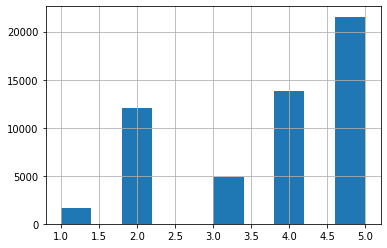

In [294]:
data['cut'].hist()


In [73]:
data['Income_composition_of_resources'].max(
) - data['Income_composition_of_resources'].min()


0.948

In [295]:
import matplotlib.pyplot as plt  # matplot library
import seaborn as sns  # seaborn library
%matplotlib inline


In [296]:
#See the correlation between features and our target => Price
income_correlation = data.corr()['price']
income_correlation


carat      0.921591
cut       -0.049421
clarity   -0.146800
depth     -0.010647
table      0.127134
price      1.000000
x          0.884435
y          0.865421
z          0.861249
Name: price, dtype: float64

In [297]:
#Use Groupby and Mean to understand the relation Between room_type and price
data[['cut','price']].groupby(['cut'],as_index=False).mean().sort_values(by='price',ascending=False)

,cut,price
3,4,4584.257704
0,1,4358.757764
1,2,3981.759891
2,3,3928.864452
4,5,3457.541970


/home/omar/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


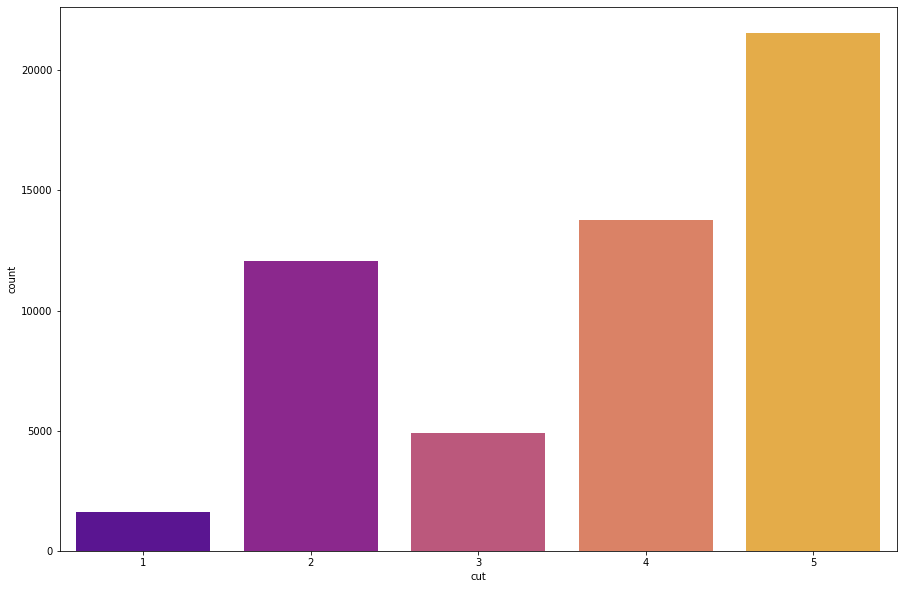

In [301]:
#Seaborn count plot for income. 
plt.figure(figsize=(15, 10))
sns.countplot(data['cut'], palette="plasma")
plt.show()


/home/omar/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


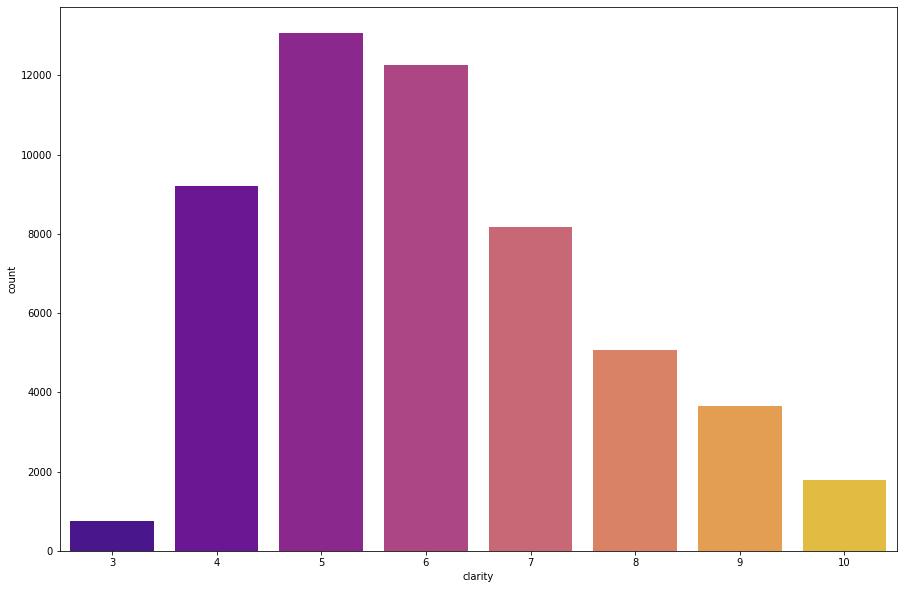

In [300]:
#Seaborn count plot for income.
plt.figure(figsize=(15, 10))
sns.countplot(data['clarity'], palette="plasma")
plt.show()


Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

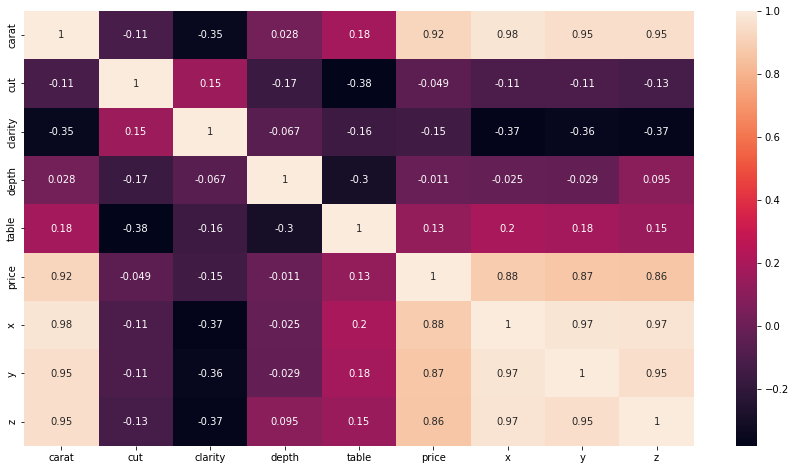

In [302]:
#Seaborn heatmap for the correlation between features
correlation_matrix = data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True)
data.columns


In [303]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,E,4,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,E,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,E,7,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,I,6,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,J,4,63.3,58.0,335,4.34,4.35,2.75


In [304]:
data.corr()['price']


carat      0.921591
cut       -0.049421
clarity   -0.146800
depth     -0.010647
table      0.127134
price      1.000000
x          0.884435
y          0.865421
z          0.861249
Name: price, dtype: float64

In [317]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
cut,53940.0,3.771060,1.265976,1.0,2.00,4.00,5.00,5.00
clarity,53940.0,6.051020,1.647136,3.0,5.00,6.00,7.00,10.00
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


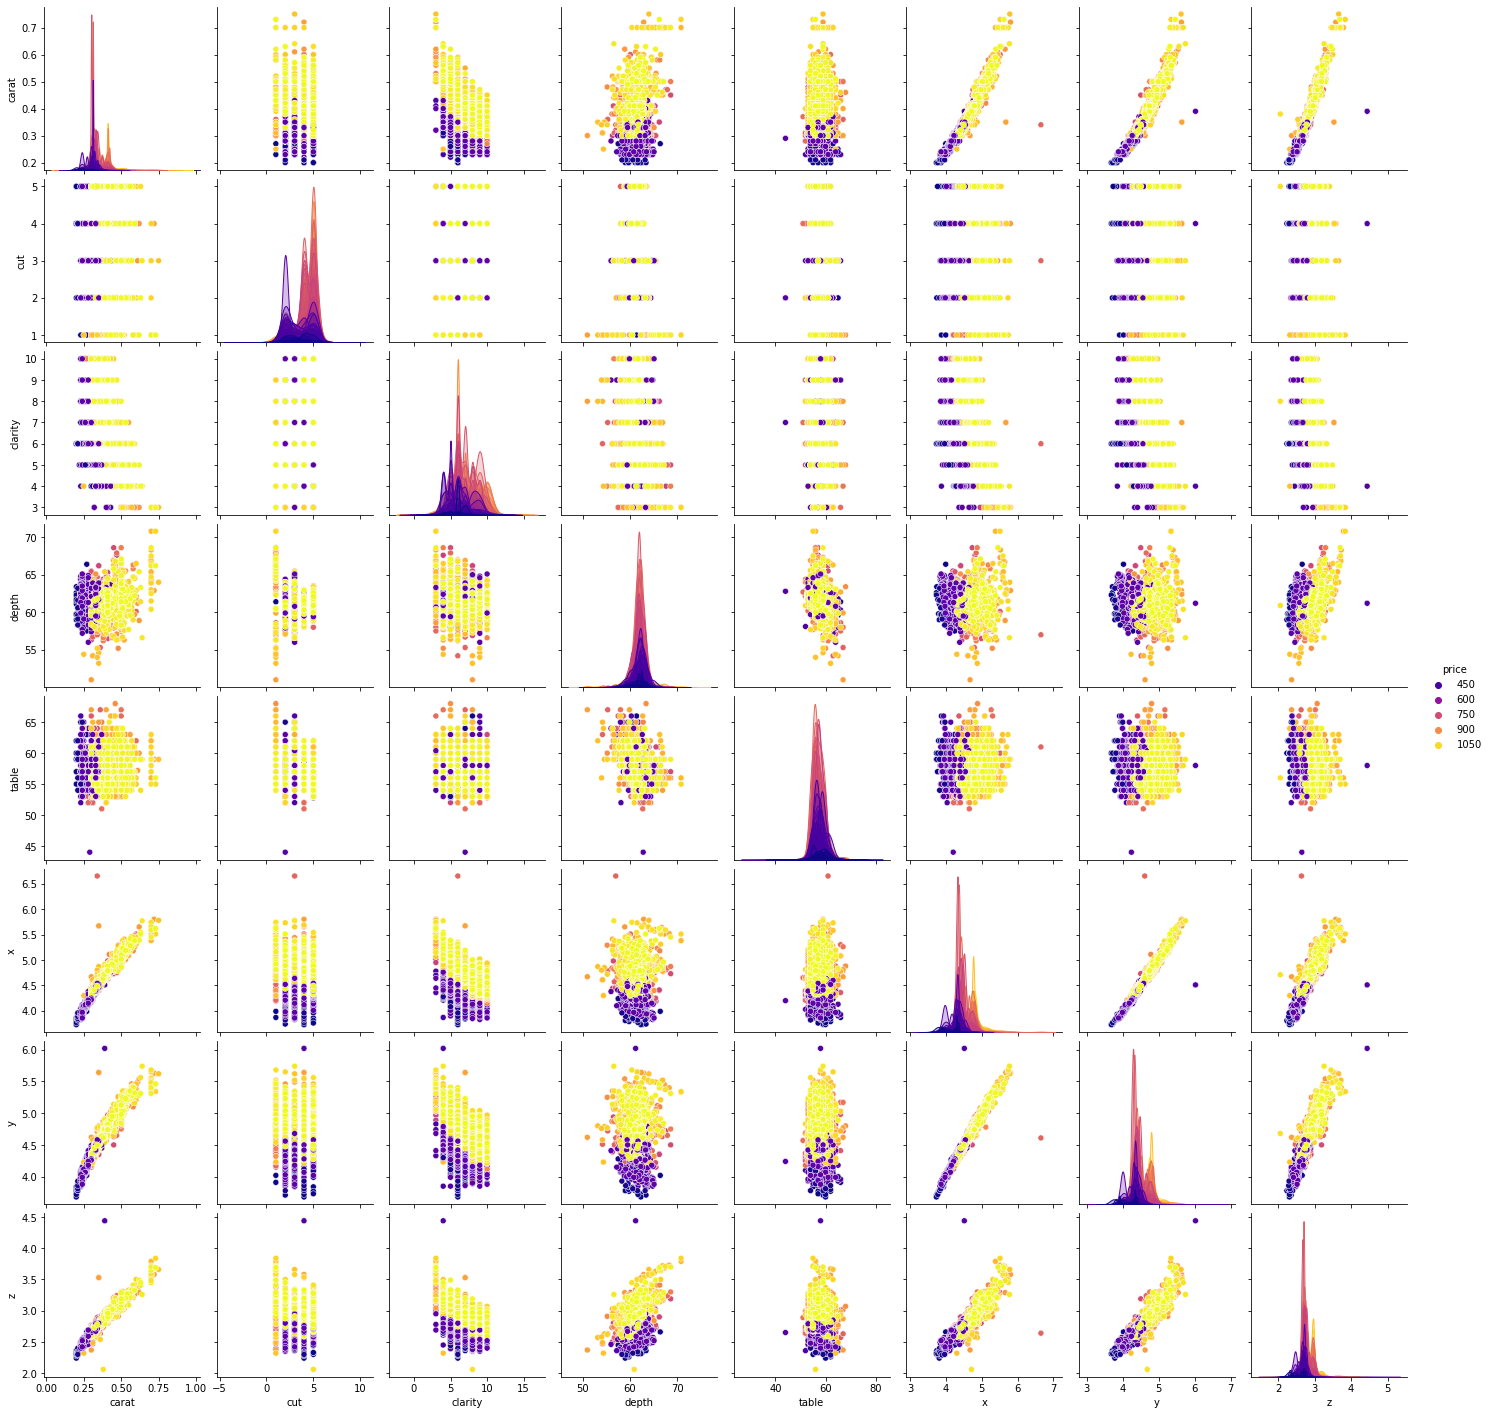

In [322]:
#Seaborn pairplot for correlation of features and Price
# sns.pairplot(data[100:1100].drop(['color'], axis=1),hue='price',palette='plasma')
sns.pairplot(data[30000:40000].drop(['color'], axis=1),hue='price',palette='plasma')

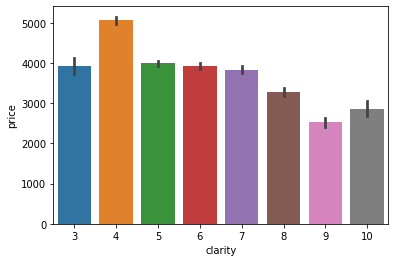

In [324]:
#Seaborn barplot for room_type and price
sns.barplot(x='clarity', y='price', data=data)
plt.show()


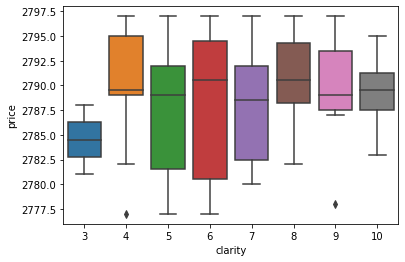

In [325]:
#Seaborn Boxplot for country and life expectancy
sns.boxplot(x='clarity', y='price', data=data[200:300])
plt.show()

/home/omar/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='depth'>

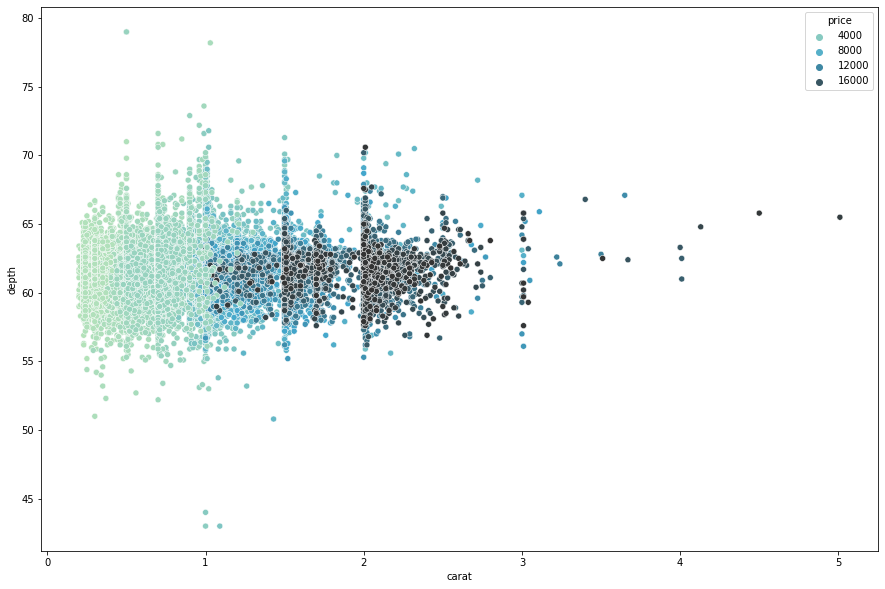

In [326]:
#Seaborn Scatter plot for Schooling and Income composition of resources with respect to Life expectancy
plt.figure(figsize=(15,10))
sns.scatterplot(data['carat'],data['depth'],hue=data['price'],palette='GnBu_d')

/home/omar/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

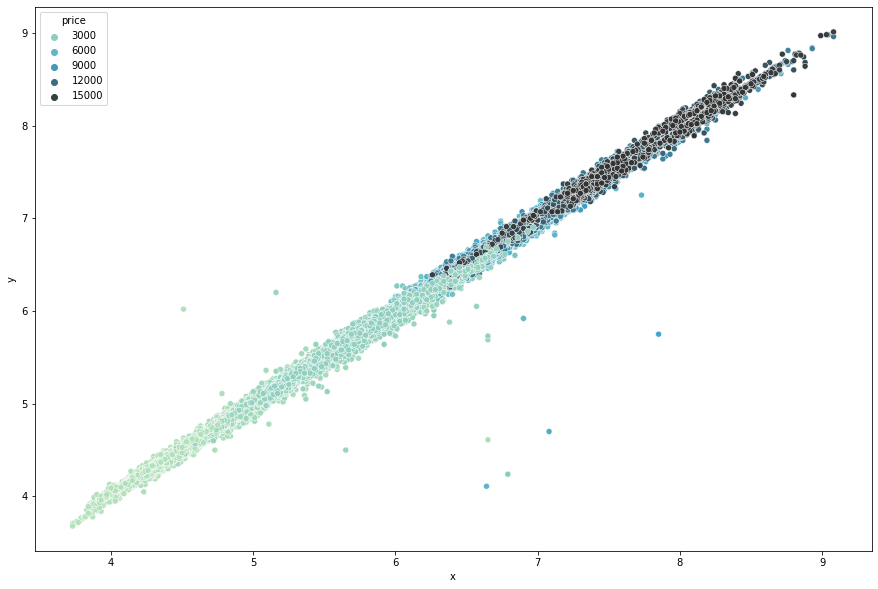

In [364]:
from scipy import stats
d = data.drop('color', axis=1)
d = d[np.abs(stats.zscore(d)) < 3]
d
#Seaborn Scatter plot for Schooling and Income composition of resources with respect to Life expectancy
plt.figure(figsize=(15,10))
sns.scatterplot(d['x'],d['y'],hue=d['price'],palette='GnBu_d')

<AxesSubplot:xlabel='color', ylabel='Count'>

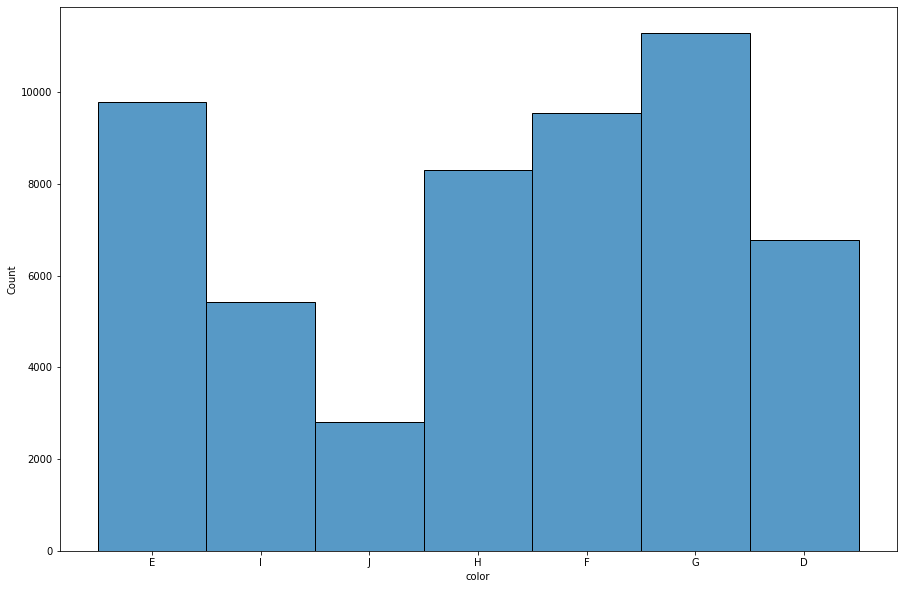

In [369]:
plt.figure(figsize=(15, 10))
sns.histplot(data['color'],palette='GnBu_d')

<AxesSubplot:xlabel='price', ylabel='Count'>

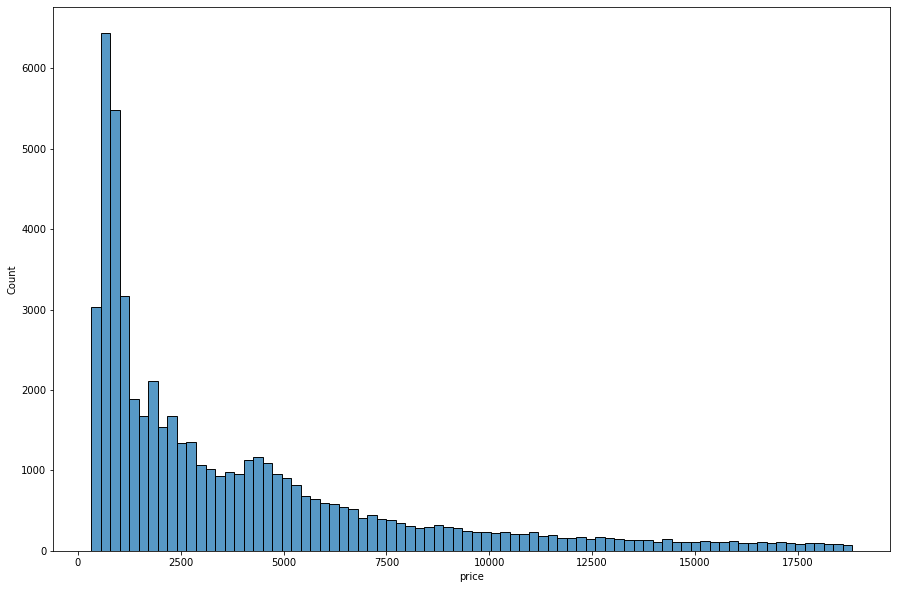

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(d['price'],palette='GnBu_d')

<AxesSubplot:xlabel='color', ylabel='price'>

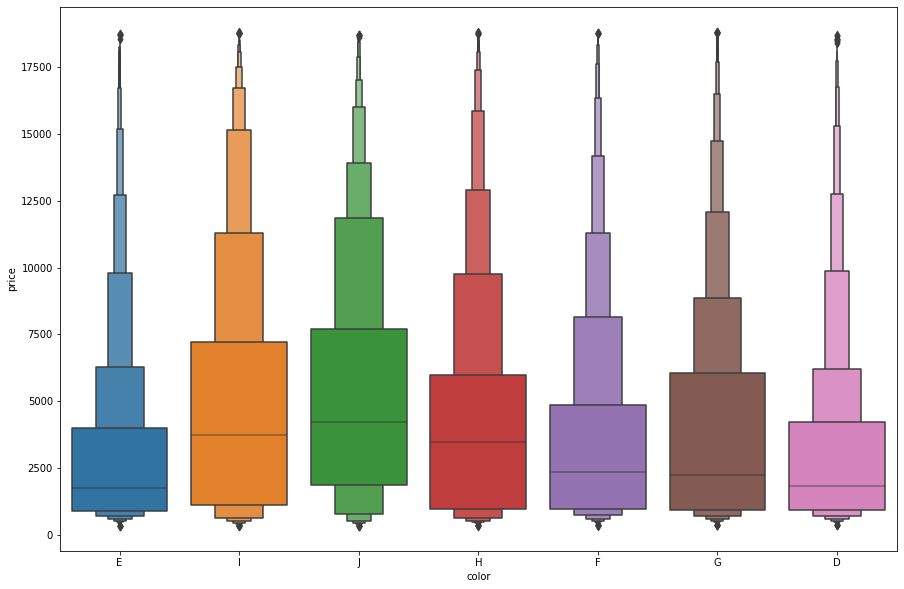

In [387]:
plt.figure(figsize=(15, 10))
sns.boxenplot(x=data['color'], y=data['price'],
              data=data)


<AxesSubplot:xlabel='carat', ylabel='price'>

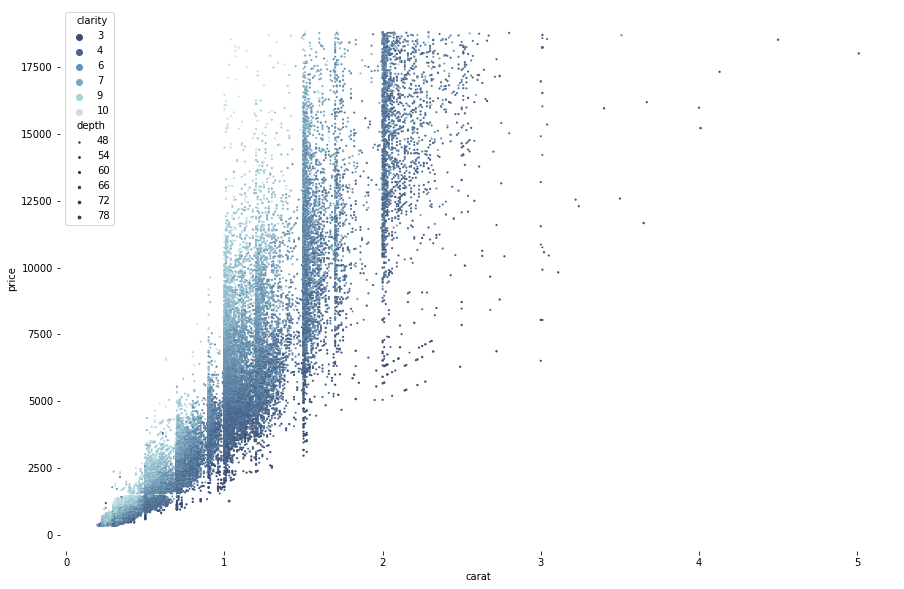

In [393]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(15, 10))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=data, ax=ax)


<Figure size 1080x720 with 0 Axes>

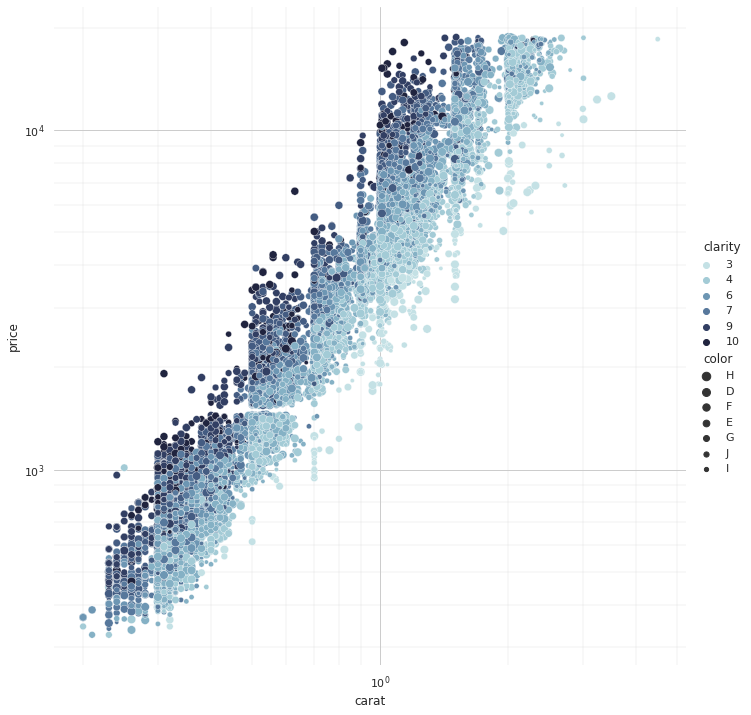

In [404]:
d = data.sample(n=15000)

plt.figure(figsize=(15, 10))
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=d,
    x="carat", y="price",
    hue="clarity", size="color",
    palette=cmap, height=10
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)


In [432]:
data.dtypes

carat      float64
cut          int64
color       object
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

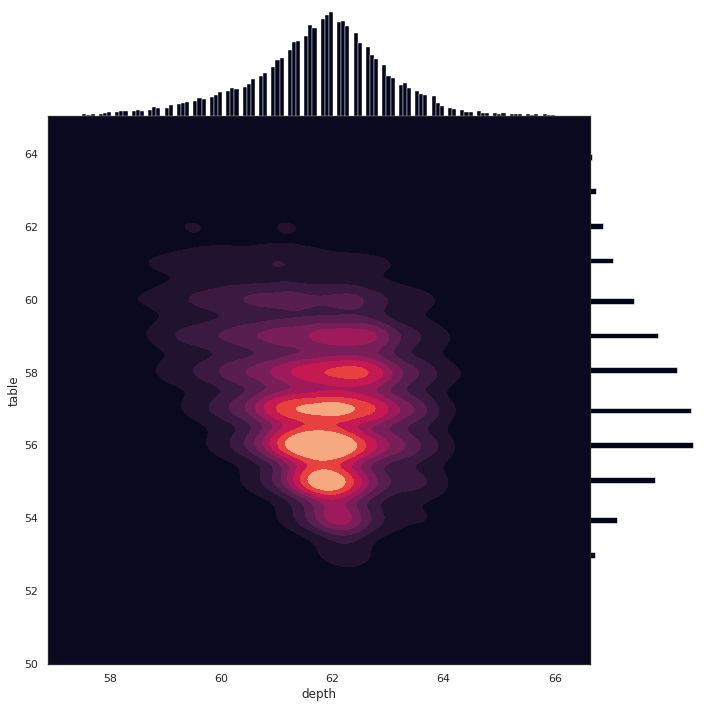

In [433]:
d = data.drop('color', axis=1)
d = d[np.abs(stats.zscore(d)) < 3]

sns.set_theme(style="white")

g = sns.JointGrid(data=d, x="depth", y="table", space=0, height=10)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1)


In [437]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
cut,53940.0,3.771060,1.265976,1.0,2.00,4.00,5.00,5.00
clarity,53940.0,6.051020,1.647136,3.0,5.00,6.00,7.00,10.00
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


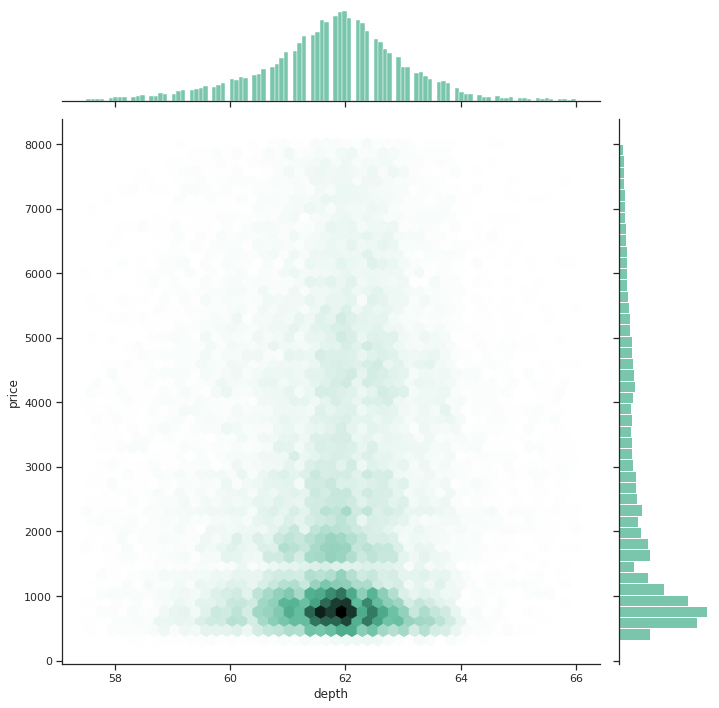

In [462]:
d = data.drop('color', axis=1)
d = d[np.abs(stats.zscore(d)) < 3]
d = d[d['price'] < 8000]
sns.set_theme(style="ticks")

sns.jointplot(x=d['depth'], y=d['price'],
              kind="hex", color="#4CB391", height=10)
# sns.jointplot(x=d['carat'], y=d['price'],
#               kind="hex", color="#4CB391", height=10)


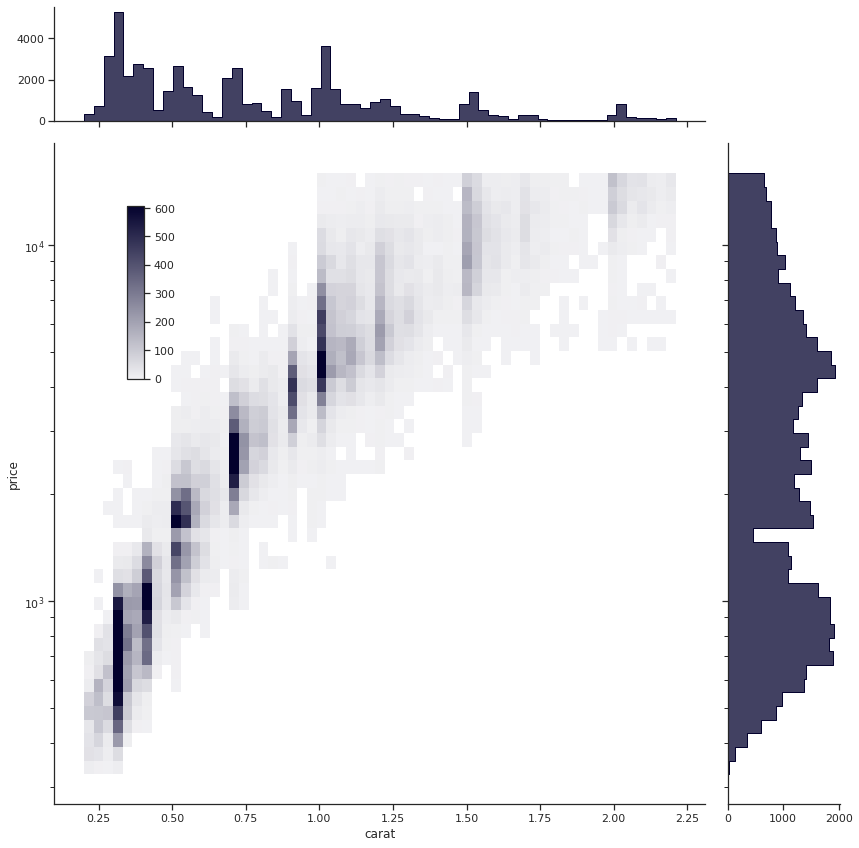

In [465]:
d = data.drop('color', axis=1)
d = d[np.abs(stats.zscore(d)) < 3]
# d = d[d['price'] < 8000]

sns.set_theme(style="ticks")

g = sns.JointGrid(data=d, x="carat", y="price", marginal_ticks=True, height=12)

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(False, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax,
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")


In [471]:
data['clarity'].unique()

array([ 4,  5,  7,  6,  8,  9,  3, 10])

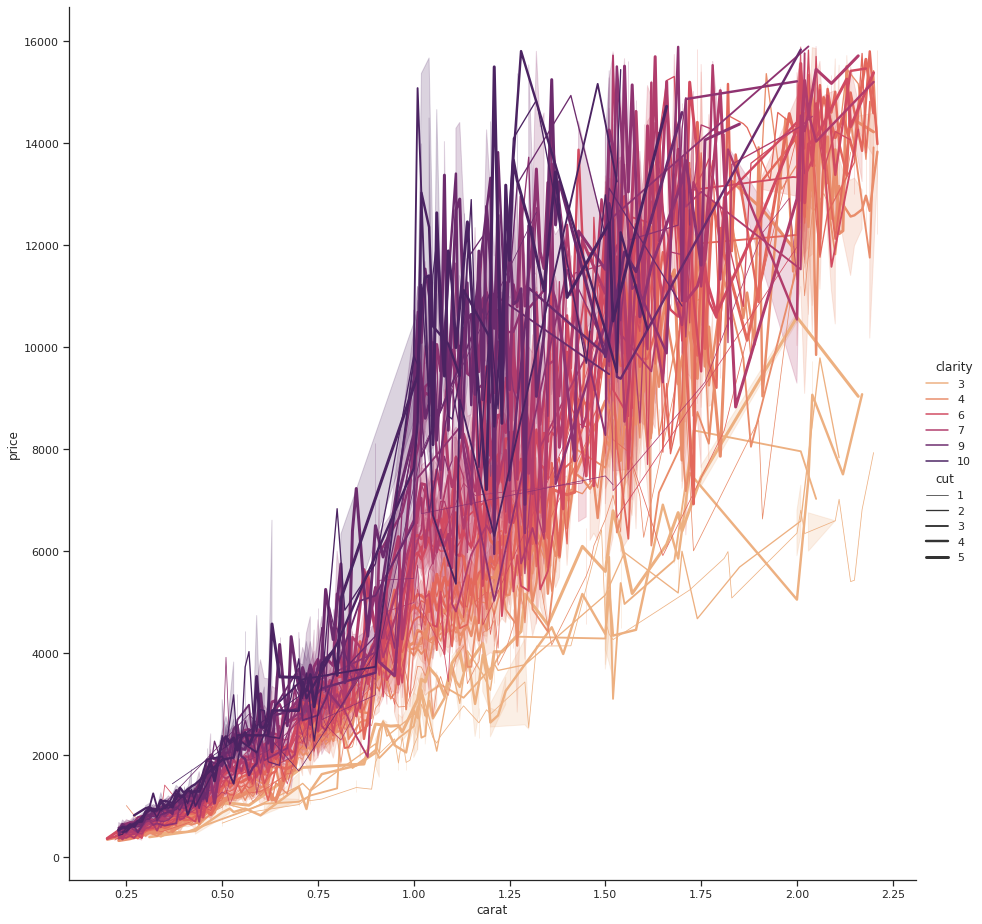

In [474]:
d = data.drop('color', axis=1)
d = d[np.abs(stats.zscore(d)) < 3]
d = d.sample(30000)
sns.set_theme(style="ticks")

# Define the palette as a list to specify exact values
palette = sns.color_palette("flare", as_cmap=True)

# Plot the lines on two facets
sns.relplot(
    data=d,
    x="carat", y="price",
    hue="clarity", size="cut",
    kind="line", palette=palette,
    height=13, facet_kws=dict(sharex=False),
)


In [356]:
[column for column in data.columns]

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

In [331]:
data.dtypes

carat      float64
cut          int64
color       object
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [54]:
data['infant_deaths'].unique()


array([  62,   64,   66,   69,   71,   74,   77,   80,   82,   84,   85,
         87,   88,    0,    1,   21,   20,   19,   67,   72,   75,   78,
         81,   90,   92,   94,   95,   96,   97,    8,    9,   10,   11,
         12,    5,    6,    7,   98,  104,  111,  118,  126,  135,  144,
        154,  164,  174,  185,  196,  207,  219,  231,   25,   13,   14,
         15,    2,   42,   44,   46,   49,   51,   54,   57,   61,   65,
         70,  103,   38,   39,   40,   41,   43,   45,   47,   48,   22,
         23,   24,   58,   59,   60,   63,   16,   17,   18,   27,   50,
         53,   56,  157,  171,  201,  215,  248,  266,  285,  307,  332,
        360,  391,  422,  457,  490,  236,  237,  238,  239,  235,  233,
        232,  229,  227,  226,   55,    3,    4,  136,  140,  145,  150,
        156,  162,  169,  177,  186,  206,  217,  228,  246,  253,   37,
         26,   28,   29,   30,   31,   32,   33,   34,   35,   36,  910,
        957, 1000, 1100, 1200, 1300, 1400, 1500, 16

#### Deep Learning

In [332]:
import tensorflow as tf
# from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, SimpleRNN, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split


In [338]:
targets = data['price'].to_numpy()

features = data.drop(['price', 'color'], axis=1)
features = features.to_numpy()

print(features.shape)
print(targets.shape)

(53940, 8)
(53940,)


In [339]:
x_train, x_test, y_train, y_test = train_test_split(
    features, targets, test_size=0.2)
y_train.shape

(43152,)

In [345]:
i = Input(shape=(8,))
x = BatchNormalization()(i)
x = Dense(18, activation='relu')(x)
x = Dense(15, activation='relu')(x)
x = Dense(10, activation='relu')(x)
x = Dense(1)(x)


In [353]:
model = Model(i, x)
model.compile(loss='mean_squared_error',
			  optimizer='adam', metrics=['mean_squared_error']) #adamax, nadam, sgd

In [354]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=80)

Epoch 1/80
1349/1349 [==============================] - 4s 2ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 2/80
 885/1349 [==================>...........] - ETA: 1s - loss: nan - mean_squared_error: nan

KeyboardInterrupt: 

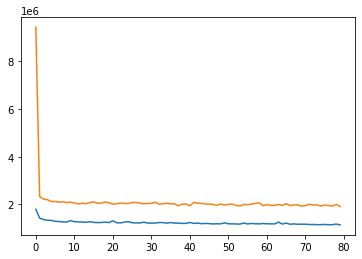

In [348]:
plt.plot(r.history["val_loss"])
plt.plot(r.history["loss"])
plt.show()


In [355]:
model.predict(x_train[10:])

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [233]:
y_train[10:]

array([89. , 61.4, 74.9, ..., 71.8, 88. , 69.4])